# Objetivos
Tratar dataset de [1] para formato YOLO v8, assim como explorar o dataset.

In [ ]:
# Baixando o dataset pelo diretório
from PIL import Image
import json
import os
from IPython.display import display

# Baixando as imagens
imagem = []  # lista de imagens
diretorio_img = '/content/drive/MyDrive/Desafio Wallace/img'
for nome_arquivo in sorted(os.listdir(diretorio_img)):
       if nome_arquivo.endswith(('.png')):
           caminho_imagem = os.path.join(diretorio_img, nome_arquivo)
           img_temp = Image.open(caminho_imagem)
           img_temp = img_temp.convert('RGB') # remove a necessidade de 4 canais de cores
           imagem.append(img_temp)
# Baixando os JSONs
dados_json = []
diretorio_json = '/content/drive/MyDrive/Desafio Wallace/ann'
for nome_arquivo in sorted(os.listdir(diretorio_json)):
       if nome_arquivo.endswith('.json'):
           caminho_json = os.path.join(diretorio_json, nome_arquivo)
           with open(caminho_json, 'r') as f:
               dados_json.append(json.load(f))

##Analisando o dataset


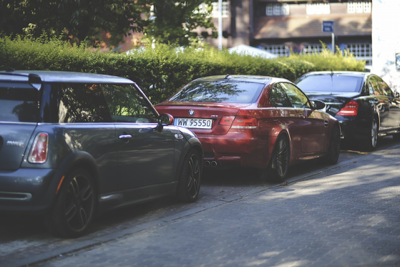

Label: [[175, 114], [214, 131]]


In [ ]:
# Extraindo coordenadas de JSON file
coordenadas = []
for i in range(len(dados_json)):
  coordenadas.append([i for i in dados_json[i]['objects'][0]['points']['exterior']])
# Plotando um exemplo
idx = 3
display (imagem[idx])
print("Label: {}".format(coordenadas[idx]))

In [ ]:
dados_json[121], imagem[121].size

({'description': '',
  'tags': [],
  'size': {'height': 478, 'width': 400},
  'objects': [{'id': 6325119,
    'classId': 8709,
    'description': '',
    'geometryType': 'rectangle',
    'labelerLogin': 'az@datasetninja.com',
    'createdAt': '2023-06-13T22:37:30.940Z',
    'updatedAt': '2023-06-13T22:37:30.940Z',
    'tags': [],
    'classTitle': 'license plate',
    'points': {'exterior': [[254, 229], [372, 264]], 'interior': []}}]},
 (400, 478))

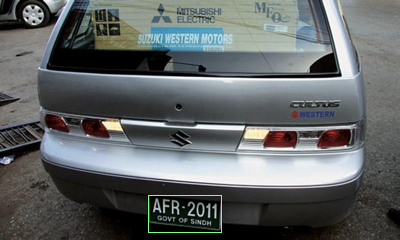

In [ ]:
from PIL import Image, ImageDraw

def rectangle_draw(img, coords):
  """Input: imagem, coordenadas( respectivo label)
     Ouput: imagem com retângulo nas placas de carro"""

  img = img.convert("RGBA")
  desenho = ImageDraw.Draw(img)
  cor = (0, 255, 0, 128)  # verde

  # Preparando as coordenadas
  x_min = coords[0][0]
  y_min = coords[0][1]
  x_max = coords[1][0]
  y_max = coords[1][1]

  # Coordenadas do retângulo
  super_esquerda = x_min, y_min
  inf_direita = x_max, y_max
  desenho.rectangle((super_esquerda,inf_direita), outline=cor)
  display(img)

# Chamando a função
idx =101
rectangle_draw(imagem[idx],coordenadas[idx])

#Tratamento de dados
Converter labels de formato COCO i.e: [x_min, y_min, width, height] formato YOLO i.e: [class, x_centro, y_centro, rect_width, rect_height], com coordenadas normalizadas de [0,1].

Dados convertidos e armazenados na lista yolo_labels e depois salvos no formato .txt

In [ ]:
yolo_labels = []
for i in range(len(coordenadas)):
  width, height = imagem[i].size
  width_rect = (coordenadas[i][1][0] - coordenadas[i][0][0])
  height_rect = (coordenadas[i][1][1] - coordenadas[i][0][1])
  X_center = coordenadas[i][0][0] + width_rect/2
  Y_center = coordenadas[i][0][1] + height_rect/2
  yolo_labels.append((0, X_center/width, Y_center/height, width_rect/width, height_rect/height))

In [ ]:
len(yolo_labels), yolo_labels[idx]

(433, (0, 0.46125, 0.8895833333333333, 0.1825, 0.15416666666666667))

##Salvando dados para treinamento e validação

In [ ]:
import zipfile

# Criando arquivo zip
with zipfile.ZipFile("labels.zip", "w") as zipf:
  for i, item in enumerate(yolo_labels):
    with zipf.open(f"Cars{i}.txt", "w") as f:
      # Removendo parentheses e vírgulas
      item = str(item).replace('(', '').replace(')', '').replace(',', '')
      f.write(item.encode())
# Download automático
from google.colab import files
files.download('labels.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Referências
[1] Dataset Ninja. Car License Plate Dataset. 2024. Disponível em: https://datasetninja.com/car-license-plate#summary. Acesso em: 20 set. 2024.

[2] Jane Torres. YOLOv8 Label Format. 2024. Disponível em: https://yolov8.org/yolov8-label-format/. Acesso em: 20 set. 2024.

